## Final Project Submission

Please fill out:
* Student name: Eric An
* Student pace: self paced
* Scheduled project review date/time: TBD
* Instructor name: Jeff Herman
* Blog post URL: TBD

# Business Understanding

This notebook will examine the King County House Sales dataset and come up with a model using multivariate linear regression to predict the sale price of houses as accurately as possible, while also examining what factors most influence the average sale price of a home. The experiment is to determine if there are certain factors that can be taken advantage of to maximize a resident's profit when selling their home.

# Data Preparation

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Preprocessing

In [2]:
df = pd.read_csv('kc_house_data.csv')

#### dataset exploration

In [3]:
display(df.head())
display(df.info())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

None

> **Observations:** We see the feature `sqft_basement` classified as an `object`, when it should be a integer value. From the category mapping file, we also recognize several features that should be classified as `category` or `object` (ie. `view`, `waterfront`, `grade`, `condition`, `zipcode`)

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


> **Observations:** The maximum value of `bedrooms` is 33, a potentially significant outlier when 75% of the data is 4 bedrooms or less (same reasoning can be applied to `sqft_living`, `sqft_above`, `sqft_living15`, `sqft_lot15`)

In [5]:
# obtain normalized value counts for each column
for col in df.columns:
    print(col, df[col].value_counts())

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
date 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
            ... 
5/24/2015      1
3/8/2015       1
2/15/2015      1
1/31/2015      1
1/17/2015      1
Name: date, Length: 372, dtype: int64
price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
bedrooms 3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00    

In [6]:
# obtain unique values for each column
for col in df.columns:
    print(col, df[col].nunique())

id 21420
date 372
price 3622
bedrooms 12
bathrooms 29
sqft_living 1034
sqft_lot 9776
floors 6
waterfront 2
view 5
condition 5
grade 11
sqft_above 942
sqft_basement 304
yr_built 116
yr_renovated 70
zipcode 70
lat 5033
long 751
sqft_living15 777
sqft_lot15 8682


> We see `sqft_basement` has a placeholder of "?" instead of NaN. We can also confirm that certain features have very little unique values, which usually points to it being categorical variable.

#### dataset cleaning

##### setting dates

In [7]:
import datetime as dt
df.date = pd.to_datetime(df['date'])
display(df.date.max())
display(df.date.min())
# convert to Gregorian ordinal value for preprocessing
df.date = df.date.map(dt.datetime.toordinal)

Timestamp('2015-05-27 00:00:00')

Timestamp('2014-05-02 00:00:00')

##### detecting and resolving null/missing/duplicate values

In [8]:
# convert '?' values in `sqft_basement` feature to 0
df.sqft_basement = df.sqft_basement.replace('?', np.nan).astype('float').fillna(0)

In [9]:
# confirm changes (0 value increased to 13280 (count) and to 0.614900 (normalized))
display(df.sqft_basement.value_counts().nlargest(n=2))
display(df.sqft_basement.value_counts(normalize=True).nlargest(n=2))

0.0      13280
600.0      217
Name: sqft_basement, dtype: int64

0.0      0.614900
600.0    0.010048
Name: sqft_basement, dtype: float64

In [10]:
# examine dataset for NaN values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

> For the `waterfront` and `view` features, we will replace the NaN values with the column mode, as these are categorical values.

> For the `yr_renovated` feature, we will replace the NaN values with '0', as we're inferring the value means the house was never renovated or the renovation date is unknown.

In [11]:
# replace NaN values in `waterfront` with mode
df.waterfront = df.waterfront.fillna(df.waterfront.mode()[0])

In [12]:
# replace NaN values in `view` with mode
df.view = df.view.fillna(df.view.mode()[0])

In [13]:
# replace NaN values in `yr_renovated` with 0
df.yr_renovated = df.yr_renovated.fillna(0)

In [14]:
# confirm NaN values are resolved
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
# check for duplicate values by unique id and date sold
df[df.duplicated(['id','date'])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


##### examining outliers

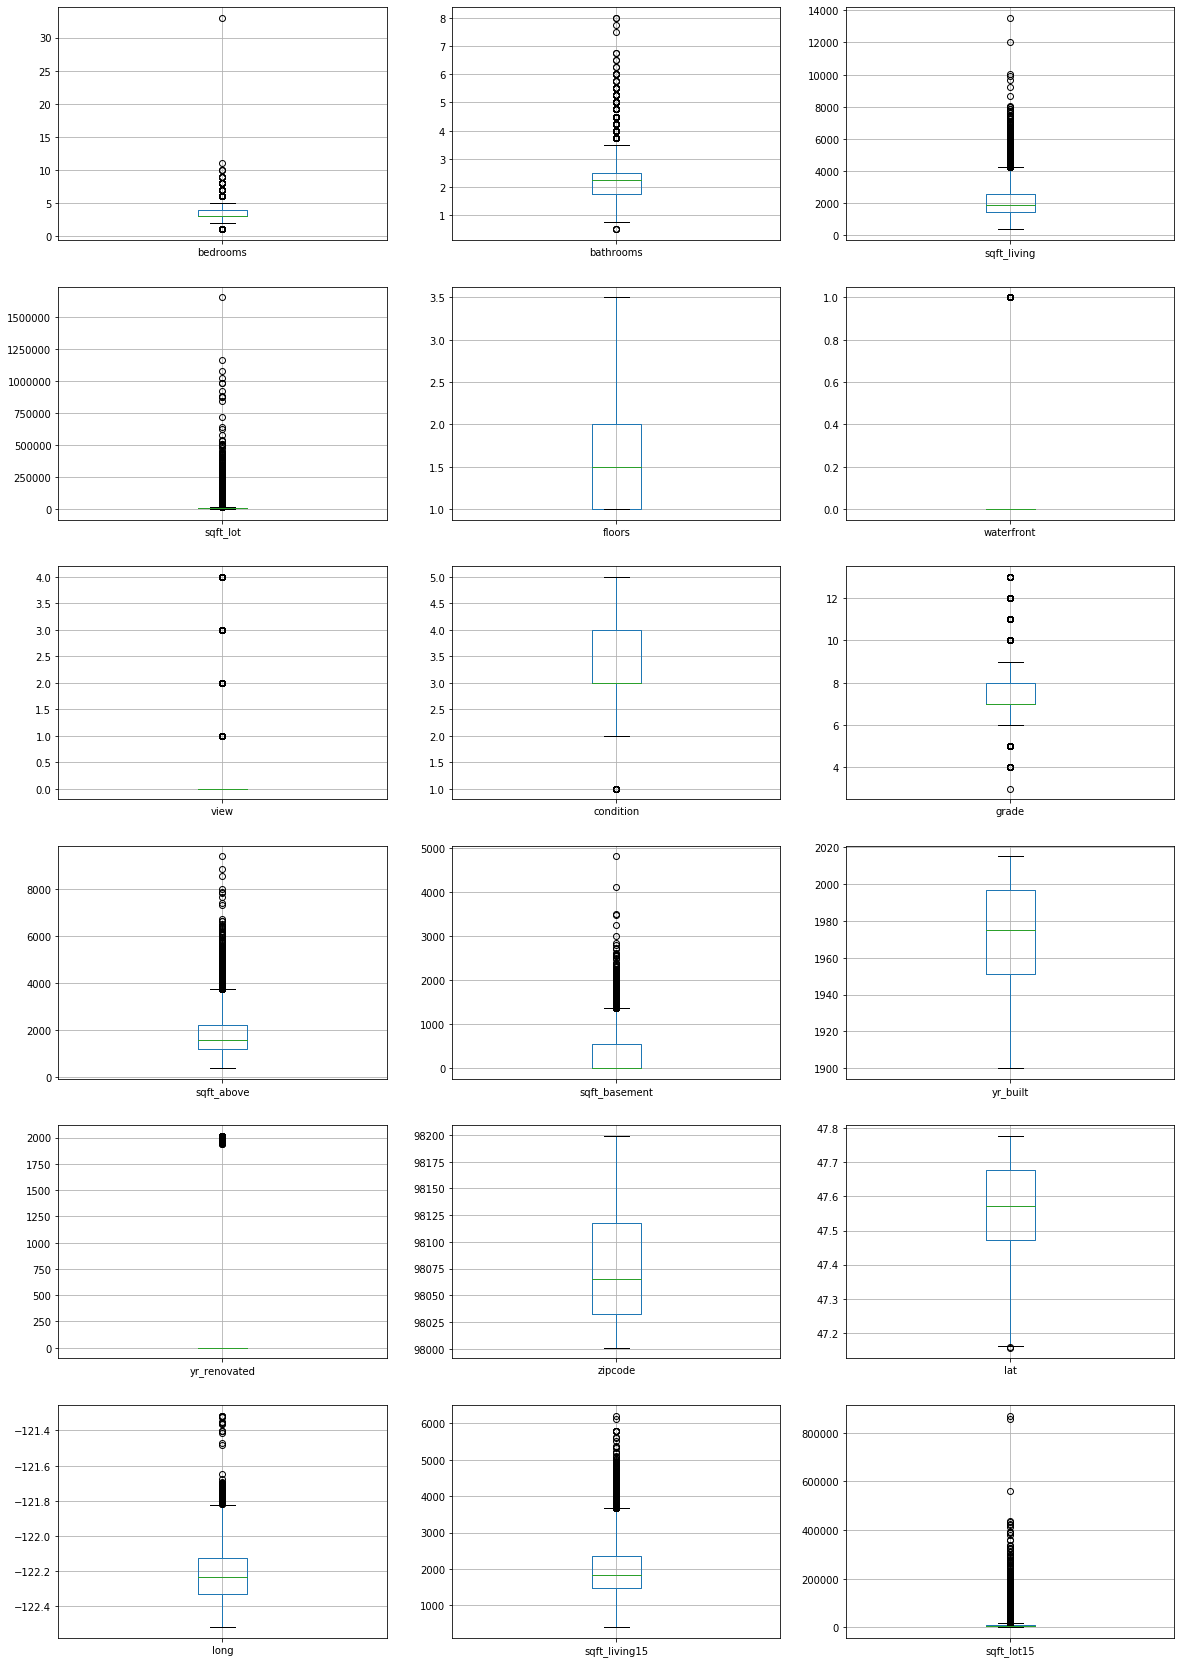

In [16]:
# create a list of column names
columns = list(df.columns)

# remove non-applicable columns
cols = [col for col in columns if col not in ('id','price', 'date')]

# create a boxplot for each feature to examine outliers
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20,30))
for xcol, ax in zip(cols, axes.flatten()):
    boxplot = df.boxplot(column=xcol, ax=ax)

> There are several continuous features (`bedrooms`, `sqft_lot`, `sqft_lot15`) that have observations that are far from the spread of the rest of the data. We'll examine the outliers a little closer below.

In [17]:
df[df.bedrooms > 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,735466,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
15856,2402100895,735409,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [18]:
df[df.sqft_lot > 1000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1717,1020069017,735684,700000.0,4,1.00,1300,1651359,1.0,0.0,3.0,...,6,1300,0.0,1920,0.0,98022,47.2313,-122.023,2560,425581
7640,2623069031,735374,542500.0,5,3.25,3010,1074218,1.5,0.0,0.0,...,8,2010,1000.0,1931,0.0,98027,47.4564,-122.004,2450,68825
7762,2323089009,735617,855000.0,4,3.50,4030,1024068,2.0,0.0,0.0,...,10,4030,0.0,2006,0.0,98045,47.4619,-121.744,1830,11700
17305,3326079016,735722,190000.0,2,1.00,710,1164794,1.0,0.0,0.0,...,5,710,0.0,1915,0.0,98014,47.6888,-121.909,1680,16730


In [19]:
df[df.sqft_lot15 > 550000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9705,225079036,735605,937500.0,4,4.0,5545,871200,2.0,0.0,0.0,...,11,3605,1940.0,2003,0.0,98014,47.6760,-121.882,3420,871200
13451,3420069060,735544,790000.0,3,2.5,2640,432036,1.5,0.0,3.0,...,10,2640,0.0,1996,0.0,98022,47.1795,-122.036,1500,560617
20436,1125079111,735703,1600000.0,4,5.5,6530,871200,2.0,0.0,2.0,...,11,6530,0.0,2008,0.0,98014,47.6640,-121.878,1280,858132


> After looking at the outlier data points, we feel comfortable only removing the `bedrooms` data point with `id` of `2402100895`. This seems like an obvious miscalculation as fitting 33 bedrooms on a 6000 sq. ft. lot seems unrealistic. <br><br> We'll leave the other outliers alone for now and determine at a later point if removing these data points will affect the model's accuracy. Another option to consider is normalizing the feature to pull in the high numbers, as well. However, this would decrase the interpretability of the model. <br><br>  We don't want to unnecessarily remove outlier data just to improve accuracy, as we acknowledge outliers can and do exist in the real world.

In [20]:
# drop the aforementioned outlier from `bedrooms`
df = df[df.id != 2402100895]

##### datatype misclassification

Earlier, we mentioned possible datatype classification errors in certain categories. Let's take a closer look at the joint plots - these visualizations will provide us a great initial look at the distribution of each feature as well as a simple regression line to see there is a linear relationship with the target variable, `price`.

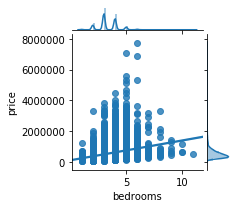

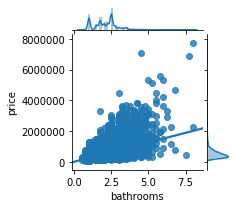

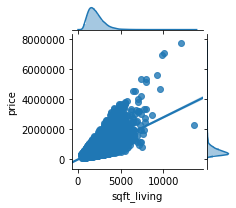

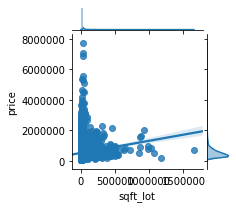

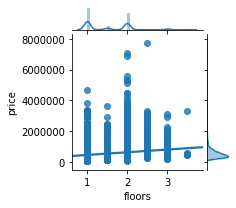

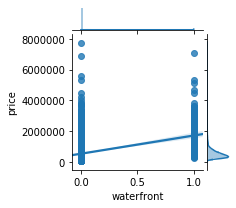

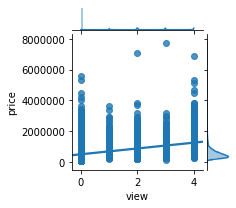

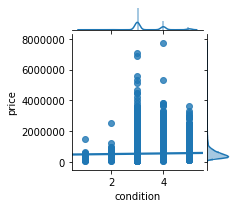

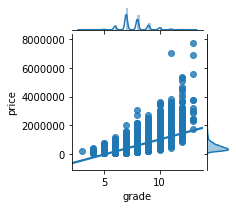

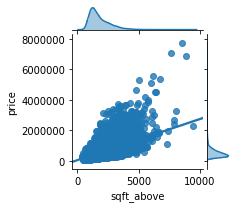

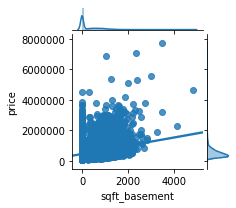

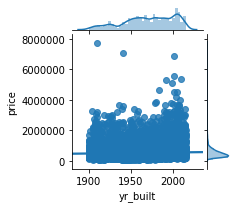

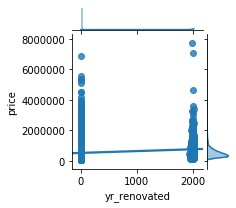

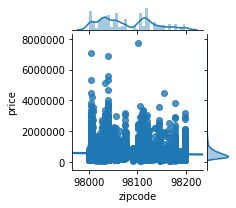

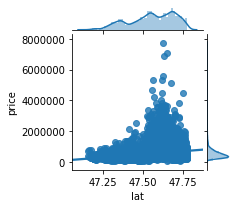

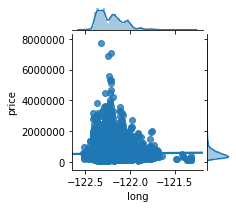

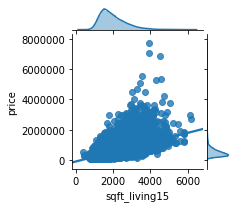

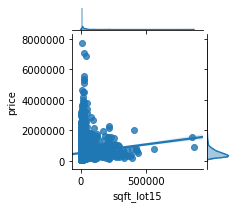

In [21]:
# use the `cols` variable defined above when we examined outliers
for col in cols:
    sns.jointplot(x= df[col], y= df['price'], data=df, kind='reg', height=3)

> A visual inspection confirms our observation earlier about the datatype misclassification of certain features that are dichotomous (`waterfront`), nominal (`zipcode`), and ordinal (`view`, `condition`, `grade`). Note that `yr_built` and `yr_renovated` could be considered categorical as well, but due to the number of values, we are treating them as continous variables in this regression.<br><br>
*reference for classifying categorical/continous variables: https://statistics.laerd.com/statistical-guides/types-of-variable.php*

In [22]:
# change relevant features to `object` dtype
cat_features = ['waterfront', 'view', 'condition', 'grade', 'zipcode']

for feat in cat_features:
        df[feat] = df[feat].astype('object')

In [23]:
# confirm datatypes have been successfully updated
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   date           21596 non-null  int64  
 2   price          21596 non-null  float64
 3   bedrooms       21596 non-null  int64  
 4   bathrooms      21596 non-null  float64
 5   sqft_living    21596 non-null  int64  
 6   sqft_lot       21596 non-null  int64  
 7   floors         21596 non-null  float64
 8   waterfront     21596 non-null  object 
 9   view           21596 non-null  object 
 10  condition      21596 non-null  object 
 11  grade          21596 non-null  object 
 12  sqft_above     21596 non-null  int64  
 13  sqft_basement  21596 non-null  float64
 14  yr_built       21596 non-null  int64  
 15  yr_renovated   21596 non-null  float64
 16  zipcode        21596 non-null  object 
 17  lat            21596 non-null  float64
 18  long  

#### address multicollinearity

In our experiment, we want to understand the role of each independent variable, or predictor, keeping all other predictors constant (the premise of regression analysis). Therefore, we need to address multicollinearity as it violates this premise and coefficients and p-values might not be reliable for correlated predictors.

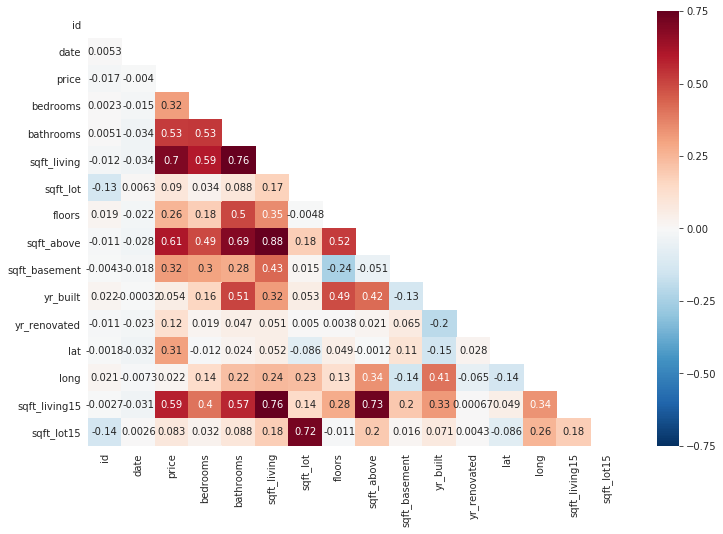

In [24]:
# create a heatmap, setting 0.75 as a threshold for determining multicollinearity
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 8))
    ax = sns.heatmap(corr, mask=mask, vmin=-0.75, vmax=0.75, annot=True, cmap="RdBu_r")
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

> We see the following highly correlated features:
- `bathrooms` and `sqft_living` (0.76)
- `sqft_above` and  `sqft_living` (0.88)
- `sqft_living15` and `sqft_living` (0.76)

We'll look at each feature's relationship to the target variable, `price`, using simple linear regression to determine which to keep for our model.

In [25]:
# create a dataframe with relevant features to run a simple OLS regression for each feature
subset = ['sqft_living', 'bathrooms', 'sqft_above', 'sqft_living15', 'price']
data = df.loc[:, subset]

results = []
for column in data.columns:
    
    # simple OLS regression model
    f = f'price~{column}'
    model = smf.ols(formula=f, data=data).fit()
    
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    
# show results in a DataFrame
pd.DataFrame(results, columns=['ind_var', 'r_squared', 'intercept', 'slope', 'p-value'])

,ind_var,r_squared,intercept,slope,p-value
0,sqft_living,0.492704,-4.401154e+04,280.868805,0.0
1,bathrooms,0.276587,8.692165e+03,251247.251822,0.0
2,sqft_above,0.366499,5.971596e+04,268.683626,0.0
3,sqft_living15,0.342537,-8.308198e+04,313.781344,0.0
4,price,1.000000,1.195986e-10,1.000000,0.0


A good general rule is to drop the feature that isn’t as strongly correlated with the target variable. Even though these variables are significant with a 0.05 $a$ threshold, we see that `bathrooms`, `sqft_above`, and `sqft_living15` relatively capture a smaller proportion of the variation that can be attributed to the target variable of `price`.

Dropping `sqft_above` makes sense as it can represent the same space as `sqft_living`. 

`bathrooms` could be turned into a dichotomous variable (yes/no), but every property would have bathroom(s). Alternatively, if we combined it with `bedrooms` as a new feature, we would be sacrificing interpretability for accuracy, so we made a choice to drop it, as well.

We decided to drop the `sqft_living15` feature as well, rather than create a combined feature with `sqft_lot15` for the same reasons of balancing interpretability and accuracy.

At this point, we will also drop a couple more features that are not highly correlated with price - any feature with a correlation value below 0.1, as this results in an r_squared value less than 0.01: `sqft_lot`, `yr_built`, `long`, `sqft_lot15`.

In the process of dropping `long`, we will drop `lat` as `zipcode` can represent the same information in a different format and to address a potential multicollinearity issue.

We will also drop `view` in this case, as we do not have enough knowledge about the dataset to understand how to interpret this feature.

Finally, we will drop `date` and `id` as these features are not highly correlated with price.

In [26]:
# drop aforementioned features to create the final preprocessed dataframe
drop_cols = ['bathrooms', 'sqft_above', 'sqft_living15', 'sqft_lot', 
             'yr_built', 'long', 'sqft_lot15', 'date', 'id', 'lat', 'view']
data = df.drop(drop_cols, axis=1)

# reset index after having dropped the outlier earlier
data.reset_index(inplace=True, drop=True)

### Modeling

First, let's set up our predictors and target variable.

In [27]:
# set independent and dependent variables
X = data.drop(['price'], axis=1)
y = data['price']

#### normalizing target value

Before taking steps to fit our model, let's take a quick look at the distribution of our target variable, `price`. 

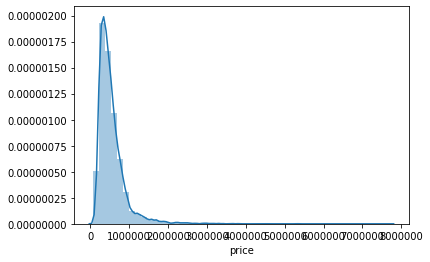

In [28]:
sns.distplot(y)

> We can see the data is heavily positively skewed and needs to be normalized. An alternative option would be trim the outliers, but that would unnecessarily cut down on our data. Slightly increasing the difficulty of the model interpretability is the easier choice in this case.

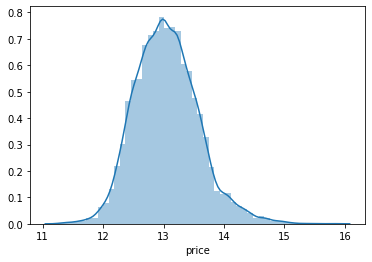

In [29]:
# normalize the target variable
log_y = np.log(y)
sns.distplot(log_y)

In [30]:
# confirm that the indexes match up and are the same class
display(X.index)
display(log_y.index)

RangeIndex(start=0, stop=21596, step=1)

RangeIndex(start=0, stop=21596, step=1)

#### train-test-split

We'll split the data into training and test sets - using the training set to select features to train our model and the test set to test the performance of these features. Keep in mind we're using our log transformed target variable, `log_y` and normalized `X_scaled` dataframe.

In [31]:
# set a random state for results reproducibility 
X_train, X_test, y_train, y_test = train_test_split(X, log_y, test_size=0.20, random_state=73)
print(len(X_train), len(X_test), len(y_train), len(y_test))

17276 4320 17276 4320


#### create baseline model

We will be fitting a linear regression line multiple times as we find the optimal model, so we'll create a reusable function to create DRY code.

In [32]:
def sk_lin_reg(X_train, X_test, y_train, y_test):
    # fit the model to the train data
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    # calculate predictions on training and test sets
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    print('r_squared:', linreg.score(X_test, y_test))
    print('Train Mean Squared Error:', mean_squared_error(y_train, y_hat_train))
    print('Test Mean Squared Error:', mean_squared_error(y_test, y_hat_test))

In [33]:
sk_lin_reg(X_train, X_test, y_train, y_test)

r_squared: 0.5952140449626017
Train Mean Squared Error: 0.10989221860324405
Test Mean Squared Error: 0.11191222777130777


The **r_squared** score is the proportion of the variance in the target variable, `price`, that is predictable from the independent variables or features. In other words, 59.5% of the variance in `price` can be explained by the predictors in our model.

There is no correct value for **Mean Squared Error**. Simply put, the lower the value the better and 0 means the model is perfect. Since it's a relative measure against another model, we'll use this MSE calculation as a baseline.

#### scaling continuous features

In [34]:
# create separate lists for continuous and categorical column names:
cont_features = [col for col in X.columns if X[col].dtype in [np.float64, np.int64]]

X_train_cont = X_train.loc[:, cont_features]
X_test_cont = X_test.loc[:, cont_features]

# min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_cont)
X_test_scaled = scaler.transform(X_test_cont)

cont_train_df = pd.DataFrame(X_train_scaled, columns=X_train_cont.columns, index=X_train.index)
cont_test_df = pd.DataFrame(X_test_scaled, columns=X_test_cont.columns, index=X_test.index)

#### one hot encoding categorical features

In [35]:
# create dataframe of only categorical features
cat_features = [col for col in X.columns if X[col].dtype in [np.object]]
X_train_cat = X_train.loc[:, cat_features]
X_test_cat = X_test.loc[:, cat_features]

# OneHotEncode categorical variables
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first') # we're dropping the first category created for each feature to prevent multicollinearity

X_train_ohe = ohe.fit_transform(X_train_cat)
X_test_ohe = ohe.transform(X_test_cat)

columns = ohe.get_feature_names(input_features=X_train_cat.columns)
cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns, index=X_train.index)
cat_test_df = pd.DataFrame(X_test_ohe.todense(), columns=columns, index=X_test.index)

#### create a dataframe by combining all features

In [36]:
X_train_all = pd.concat([cont_train_df, cat_train_df], axis=1)
X_test_all = pd.concat([cont_test_df, cat_test_df], axis=1)

#### fit model again

Having one-hot encoded our data, let's examine the impact on our model. Earlier, we created a function for predicting linear regression using scikit-learn's library. We will create another function for predicint linear regression using statsmodel's library.

In [37]:
def sm_lin_reg(x, y):
    # add a constant term
    predictors_int = sm.add_constant(x)
    return sm.OLS(y, predictors_int).fit()

In [38]:
model_ohe = sm_lin_reg(X_train_all, y_train)
print(model_ohe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1213.
Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:29:29   Log-Likelihood:                 3710.2
No. Observations:               17276   AIC:                            -7240.
Df Residuals:                   17186   BIC:                            -6542.
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.1060      0.201     60.

In [39]:
sk_lin_reg(X_train_all, X_test_all, y_train, y_test)

r_squared: 0.8657877727312486
Train Mean Squared Error: 0.038105545474115196
Test Mean Squared Error: 0.03710600420018853


> We do see the **r_squared** value having increased from our baseline model of **0.595** to **0.866**. However, we have also increased the number of predictors from **11** to **89**. 

#### remove insignificant predictors

We'll remove some predictors that are causing noise in the model by examining the p-value significance levels of the predictors. If a coefficient's p-value is below 0.05, we can reject the null hypothesis that there is no effect on the model and continue to include it.

In line with keeping the DRY principle, we will create a function for this process, as we will iterate a couple times.

In [40]:
def remove_low_p(model):
    # keep predictors with p-value < 0.05
    summary = model.summary()
    p_table = summary.tables[1]
    p_table = pd.DataFrame(p_table.data)
    p_table.columns = p_table.iloc[0] # rename column names to the stats
    p_table = p_table.drop(0) # drop first row
    p_table = p_table.set_index(p_table.columns[0]) # set index as feature names
    p_table['P>|t|'] = p_table['P>|t|'].astype(float)
    x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
    x_cols.remove('const')
    print('initial # of features:', len(p_table))
    print('resulting # of features:', len(x_cols))
    return x_cols    

In [41]:
# pass in the model we just created after OHE
x_cols = remove_low_p(model_ohe)

initial # of features: 90
resulting # of features: 76


> We were able to reduce the number of coefficents by **14 predictors**.

We'll check the model's coeffients again to see if there are any more p-values greater than 0.05 using the same steps above.

In [42]:
# create a new DataFrame with the significant features
df_significant = X_train_all[x_cols]
model = sm_lin_reg(df_significant, y_train)
x_cols = remove_low_p(model)

initial # of features: 77
resulting # of features: 74


Let's check it one more time, as three more features were additionally shown to be insignificant.

In [43]:
df_significant_revised = X_train_all[x_cols]
model = sm_lin_reg(df_significant, y_train)
x_cols = remove_low_p(model)

initial # of features: 77
resulting # of features: 74


> We see that the number of predictors stayed the same. Hence, there are no more predictors with p-values greater than 0.05.

In [44]:
# create the final DataFrame with the significant features
df_significant_final = X_train_all[x_cols]

In [45]:
# remove the insignificant features from the test set
X_test_all = X_test_all[x_cols]

In [46]:
# run linear model as before
sk_lin_reg(df_significant_final, X_test_all, y_train, y_test)

r_squared: 0.8444633715004892
Train Mean Squared Error: 0.04431932356837763
Test Mean Squared Error: 0.043001616975100694


> As a result of removing insignificant predictors with p-values above 0.05, our **r_squared** value has *slightly decreased* to 0.844, but we do see a **noticeable drop** in our MSE from our base line model, which is a good sign this model is more accurately predicting the variability, while eliminating some of the noise created by creating dummy variables.

#### removing features using recursive feature elimination (RFE)

We'll use the RFE technique to further refine the model and remove features that are adding noise to the model.

In [47]:
linreg = LinearRegression()

def rfe(x,y,number):
    selector = RFE(linreg, n_features_to_select=number)
    selector = selector.fit(x, y)
    estimators = selector.estimator_
    X_RFE = x[x.columns[selector.support_]]
    return X_RFE

r_squared_values = []

for number in range(1,len(x_cols)):
    X_RFE = rfe(df_significant_final, y_train, number)
    linreg.fit(X_RFE, y_train)
    r_squared_values.append(linreg.score(X_RFE, y_train))

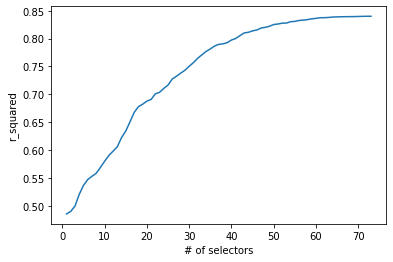

In [48]:
plt.plot(range(1,len(x_cols)),r_squared_values)
plt.xlabel('# of selectors')
plt.ylabel('r_squared')
plt.show();

> The graph shows a *very slight plateau* in r_squared when the # of features is around ~35. We'll take a look at this range to determine the exact number of features to select.

In [49]:
# obtain # of features to select by examining the r_squared values from our list
y = []
for value in range(35,45):
    x = r_squared_values[value]
    y.append(x)
    print(value, x)
    
[(a1 - a2) / a2 for a1, a2 in zip(y[1:], y)]

35 0.7866297510233257
36 0.7897788324936884
37 0.7906162279130213
38 0.7927183945290475
39 0.7974782478709279
40 0.8001992515224141
41 0.8052693933775544
42 0.8101639551761715
43 0.8114010057986487
44 0.8139402646815541


[0.004003257525241209,
 0.0010602910395672226,
 0.0026588963669202633,
 0.006004469398881893,
 0.003412009868294982,
 0.006336099222155173,
 0.006078166932543761,
 0.001526913922266827,
 0.0031294746552674693]

> We see the smallest incremental increase in r_squared value at 36 features.

In [50]:
# we see the r_squared plateau at 35 features, so we'll use 35 features in our model
X_RFE_36 = rfe(df_significant_final, y_train, 36)
X_RFE_36.columns

Index(['sqft_living', 'sqft_basement', 'waterfront_1.0', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98027', 'zipcode_98029', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98107', 'zipcode_98109',
       'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117',
       'zipcode_98119', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98177', 'zipcode_98199'],
      dtype='object')

### final model

In [51]:
# run OLS regression using statsmodel
final_model = sm_lin_reg(X_RFE_36, y_train)
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     1765.
Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:30:21   Log-Likelihood:                -95.097
No. Observations:               17276   AIC:                             264.2
Df Residuals:                   17239   BIC:                             551.2
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.1775      0.004   2780.

> Our analysis entailed performing EDA on the King County House Sales dataset to create a model that can predict the sale price of houses as accurately as possible. Our model can explain **78.7%** of the variance in the selling price of a house.

#### checking for the normality assumption

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


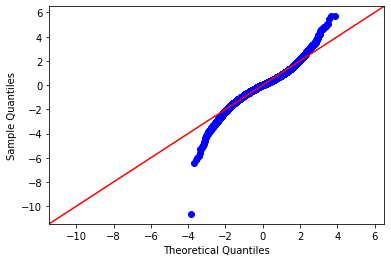

In [52]:
# Q-Q plot to check for the normality assumption
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

> We do see that the current model doesn't satisfy the normality assumption. Let's address it by examining the outliers causing the tail.

In [53]:
outliers = pd.DataFrame(residuals.sort_values()[:15])

In [54]:
# create a list of the outliers' indices
outlier_list = list(outliers[0].index)

In [55]:
# create a function to remove the outliers from the training data
def remove_outlier(outlier_list,x,y):
    for outlier in outlier_list:
        x = x[x.index != outlier]
        y = y[y.index != outlier]
    return x,y

In [56]:
# run the function on our dataset
X_RFE_36, y_train = remove_outlier(outlier_list, X_RFE_36, y_train)

In [57]:
# fit the model one more time to get model results
model = sm_lin_reg(X_RFE_36, y_train)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     1806.
Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:30:22   Log-Likelihood:                 105.88
No. Observations:               17261   AIC:                            -137.8
Df Residuals:                   17224   BIC:                             149.2
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.1709      0.004   2791.

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


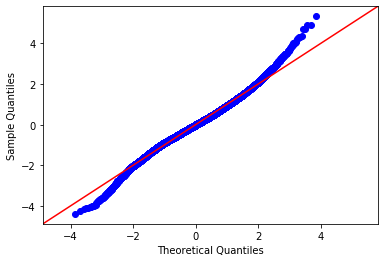

In [58]:
# Q-Q plot to check for the normality assumption
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

> After removing 15 of the biggest outliers that were creating a tail in our normality plot, we see a plot resembling more of a normal distribution and the r_squared value having slightly increased to 80.1%.

#### comparing coefficients

We can compare the coefficients to determine which predictor has the greatest impact on the average sale price of the house.

In [59]:
# use the final model's parameters to sort the coefficients in descending order
results = pd.DataFrame(model.params, columns=['coefficient'])

# display top 10 results
print('top 10 coefficients: \n', results['coefficient'].sort_values(ascending=False)[:10])
print('-----------')
# display last 10 results
print('bottom 10 coefficients: \n', results['coefficient'].sort_values(ascending=True)[:10])

top 10 coefficients: 
 const            12.170878
sqft_living       4.832552
zipcode_98039     1.064377
zipcode_98004     0.934154
zipcode_98112     0.866315
zipcode_98109     0.850481
zipcode_98119     0.846624
zipcode_98102     0.801014
zipcode_98105     0.758870
zipcode_98040     0.753054
Name: coefficient, dtype: float64
-----------
bottom 10 coefficients: 
 sqft_basement   -0.373004
zipcode_98126    0.311614
zipcode_98072    0.317169
zipcode_98027    0.317529
zipcode_98125    0.337793
zipcode_98034    0.341467
zipcode_98053    0.373633
zipcode_98074    0.375230
zipcode_98075    0.386514
zipcode_98029    0.410198
Name: coefficient, dtype: float64


> We see that the `sqft_living` - or in other words, the square footage of living space, has the most impact on the average sale price of a home. Also impactful is having the property located in certain zipcodes like `98039`, `98004`, and `98112`.

#### revert feature data to original scale

Before we interpret our coefficients, we have to remember that our target variable, `price`, is in a log-transformed state, but the predictors are in the original metric. In addition, since our features have been scaled, we'll first need to create a complimentary model with unscaled coefficients to corretly interpret the model.

In [60]:
# a reminder on what features exist in our final model
X_RFE_36.columns

Index(['sqft_living', 'sqft_basement', 'waterfront_1.0', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98027', 'zipcode_98029', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98107', 'zipcode_98109',
       'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117',
       'zipcode_98119', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98177', 'zipcode_98199'],
      dtype='object')

In [64]:
# create a copy of our original preprocessed X_train dataframe for original datapoints
X_unscaled_df = X_train.copy()

# only features we are interested in
cont_subset = ['sqft_living', 'sqft_basement']
cat_subset = ['waterfront', 'zipcode']

# create dataframes
X_unscaled_cat = X_unscaled_df.loc[:, cat_subset]
X_unscaled_cont = X_unscaled_df.loc[:, cont_subset]

# OneHotEncode categorical variables
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first') # we're dropping the first category created for each feature to prevent multicollinearity

X_unscaled_ohe = ohe.fit_transform(X_unscaled_cat)

# create pandas dataframe of one hot encoded categorical features
columns = ohe.get_feature_names(input_features=X_unscaled_cat.columns)
X_unscaled_cat = pd.DataFrame(X_unscaled_ohe.todense(), columns=columns, index=X_unscaled_df.index)

# combine categorical and continuous features
X_unscaled = pd.concat([X_unscaled_cat, X_unscaled_cont], axis=1)
X_unscaled

,waterfront_1.0,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,sqft_living,sqft_basement
7847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3320,370.0
13378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1720,0.0
1017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1480,0.0
5410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3220,0.0
19970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4570,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3290,620.0
16144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1840,0.0
8586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1220,0.0
4014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1540,0.0


In [65]:
# create final dataframe of relevant columns of final model
X_unscaled = X_unscaled[X_RFE_36.columns]

# remove the same outliers from the unscaled dataframe as earlier
X_unscaled, y_train = remove_outlier(outlier_list, X_unscaled, y_train)

In [66]:
# fit the model one more time to get model results with unscaled coefficients
unscaled_model = sm_lin_reg(X_unscaled, y_train)
print(unscaled_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     1806.
Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:32:28   Log-Likelihood:                 105.88
No. Observations:               17261   AIC:                            -137.8
Df Residuals:                   17224   BIC:                             149.2
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.0351      0.005   2369.

In [67]:
# use the unscaled model's parameters to sort the coefficients
results = pd.DataFrame(unscaled_model.params, columns=['coefficient'])

# display top 10 results
print('top 10 coefficients: \n', results['coefficient'].sort_values(ascending=False)[:10])
print('-----------')
# display last 10 results
print('bottom 10 coefficients: \n', results['coefficient'].sort_values(ascending=True)[:10])

top 10 coefficients: 
 const             12.035111
zipcode_98039      1.064377
zipcode_98004      0.934154
zipcode_98112      0.866315
zipcode_98109      0.850481
zipcode_98119      0.846624
zipcode_98102      0.801014
zipcode_98105      0.758870
zipcode_98040      0.753054
waterfront_1.0     0.721422
Name: coefficient, dtype: float64
-----------
bottom 10 coefficients: 
 sqft_basement   -0.000077
sqft_living      0.000367
zipcode_98126    0.311614
zipcode_98072    0.317169
zipcode_98027    0.317529
zipcode_98125    0.337793
zipcode_98034    0.341467
zipcode_98053    0.373633
zipcode_98074    0.375230
zipcode_98075    0.386514
Name: coefficient, dtype: float64


#### interpreting the coefficients

In [69]:
# exponentiate the coefficient of zipcode_98039 (value: 1.064377)
print('percentage change of zipcode_98039:', round(((np.exp(1.064377) - 1) * 100),2))

percentage change of zipcode_98039: 189.9


> In other words, being in **zipcode 98112**, the average sale price **increases** by **189.9%**.

In [70]:
# exponentiate the coefficient of waterfront_1.0 (value: 0.721422)
print('percentage change of waterfront_1.0:', round(((np.exp(0.721422) - 1) * 100),2))

percentage change of waterfront_1.0: 105.74


> In other words, having a **waterfront** property increases the average sale price by **105.74%.**

### Conclusion

We see that relative to other predictors, the property's **zipcode** has the most impact on the average sale price of the home, with properties in zipcode 98039 having the highest impact on the average sale price. This conclusion makes sense as certain tracts of land could be better positioned for higher average home values, whether it be a geographical advantage, socioeconomic effects, or neighborhood factors like school systems, community, and crime rates.

Alternatively, we see predictors like **sqft_basement** and the **zipcode_98126** assigned to the property having the lowest relative impact on the average sale price.

The conclusion is that there are no immediate, highly impactful actions to take to maximize profit when selling their home, as it isn't feasible to transplant their home into one of the zipcodes that had higher average home values, as modeled by the data.

<img src="images/Snoqualmie_Falls.jpeg" width=450>

<center><i> Snoqualmie Falls in King County</i></center>